In [1]:
import pandas as pd
import numpy as np
import os
import json
from pandas.io.json import json_normalize
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('train_v2.csv', nrows = 25000 )

In [3]:
df.head()

,channelGrouping,customDimensions,date,device,fullVisitorId,geoNetwork,hits,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",3162355547410993243,"{""continent"": ""Europe"", ""subContinent"": ""Weste...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508198450,1,1508198450
1,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8934116514970143966,"{""continent"": ""Americas"", ""subContinent"": ""Nor...","[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""2"", ""pageviews"": ""2"",...","{""referralPath"": ""/a/google.com/transportation...",1508176307,6,1508176307
2,Direct,"[{'index': '4', 'value': 'North America'}]",20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",7992466427990357681,"{""continent"": ""Americas"", ""subContinent"": ""Nor...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""2"", ""pageviews"": ""2"",...","{""campaign"": ""(not set)"", ""source"": ""(direct)""...",1508201613,1,1508201613
3,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9075655783635761930,"{""continent"": ""Asia"", ""subContinent"": ""Western...","[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""2"", ""pageviews"": ""2"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508169851,1,1508169851
4,Organic Search,"[{'index': '4', 'value': 'Central America'}]",20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",6960673291025684308,"{""continent"": ""Americas"", ""subContinent"": ""Cen...","[{'hitNumber': '1', 'time': '0', 'hour': '14',...",Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""2"", ""pageviews"": ""2"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508190552,1,1508190552


In [5]:
def load_df(csv_path='train_v2.csv', nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'},
                     nrows=nrows)
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df

In [6]:
df = load_df('train_v2.csv', nrows= 100000)

<ipython-input-5-5d8b39117d25>:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  column_as_df = json_normalize(df[column])


Loaded train_v2.csv. Shape: (100000, 59)


In [7]:
df.head()

,channelGrouping,customDimensions,date,fullVisitorId,hits,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,...,trafficSource.keyword,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.referralPath,trafficSource.isTrueDirect,trafficSource.adContent,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,3162355547410993243,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,1508198450,1,1508198450,Firefox,...,water bottle,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,8934116514970143966,"[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,1508176307,6,1508176307,Chrome,...,NaN,not available in demo dataset,/a/google.com/transportation/mtv-services/bike...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Direct,"[{'index': '4', 'value': 'North America'}]",20171016,7992466427990357681,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,1508201613,1,1508201613,Chrome,...,NaN,not available in demo dataset,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,9075655783635761930,"[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",Not Socially Engaged,1508169851,1,1508169851,Chrome,...,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Organic Search,"[{'index': '4', 'value': 'Central America'}]",20171016,6960673291025684308,"[{'hitNumber': '1', 'time': '0', 'hour': '14',...",Not Socially Engaged,1508190552,1,1508190552,Chrome,...,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df = df.drop(['hits'], axis=1)

In [9]:
df[['index', 'value']] = df.customDimensions.str.split(", ",expand=True)

In [10]:
df['index'].value_counts()

[{'index': '4'    79786
[]                20214
Name: index, dtype: int64

In [11]:
df = df.drop(['customDimensions', 'index'], axis=1)

In [12]:
df['value']= df['value'].str[10:-3]

In [13]:
df.head()

,channelGrouping,date,fullVisitorId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,device.browserSize,...,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.referralPath,trafficSource.isTrueDirect,trafficSource.adContent,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,value
0,Organic Search,20171016,3162355547410993243,Not Socially Engaged,1508198450,1,1508198450,Firefox,not available in demo dataset,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EMEA
1,Referral,20171016,8934116514970143966,Not Socially Engaged,1508176307,6,1508176307,Chrome,not available in demo dataset,not available in demo dataset,...,not available in demo dataset,/a/google.com/transportation/mtv-services/bike...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America
2,Direct,20171016,7992466427990357681,Not Socially Engaged,1508201613,1,1508201613,Chrome,not available in demo dataset,not available in demo dataset,...,not available in demo dataset,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,North America
3,Organic Search,20171016,9075655783635761930,Not Socially Engaged,1508169851,1,1508169851,Chrome,not available in demo dataset,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EMEA
4,Organic Search,20171016,6960673291025684308,Not Socially Engaged,1508190552,1,1508190552,Chrome,not available in demo dataset,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Central America


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 58 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   channelGrouping                                    100000 non-null  object
 1   date                                               100000 non-null  int64 
 2   fullVisitorId                                      100000 non-null  object
 3   socialEngagementType                               100000 non-null  object
 4   visitId                                            100000 non-null  int64 
 5   visitNumber                                        100000 non-null  int64 
 6   visitStartTime                                     100000 non-null  int64 
 7   device.browser                                     100000 non-null  object
 8   device.browserVersion                              100000 non-null  object
 9   devic

In [15]:
df['value'].value_counts()

North America      43785
EMEA               18371
APAC               13306
South America       2743
Central America     1581
Name: value, dtype: int64

In [16]:
df = df.drop(['socialEngagementType', 'device.browserVersion', 'device.browserSize', 'device.operatingSystemVersion',
              'device.mobileDeviceBranding', 'trafficSource.adwordsClickInfo.criteriaParameters', 'device.mobileDeviceModel', 
              'device.mobileInputSelector', 'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName', 'device.flashVersion', 
              'device.language', 'device.screenColors', 'device.screenResolution', 'geoNetwork.metro', 'geoNetwork.city', 
              'geoNetwork.cityId', 'geoNetwork.networkDomain', 'geoNetwork.latitude', 'geoNetwork.longitude', 'geoNetwork.networkLocation',
              'trafficSource.campaign', 'trafficSource.keyword', 'trafficSource.referralPath', 'trafficSource.adwordsClickInfo.gclId',
              'trafficSource.campaignCode'
             ], axis=1)

KeyError: "['trafficSource.campaignCode'] not found in axis"

In [17]:
df.head()

,channelGrouping,date,fullVisitorId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,device.browserSize,...,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.referralPath,trafficSource.isTrueDirect,trafficSource.adContent,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,value
0,Organic Search,20171016,3162355547410993243,Not Socially Engaged,1508198450,1,1508198450,Firefox,not available in demo dataset,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EMEA
1,Referral,20171016,8934116514970143966,Not Socially Engaged,1508176307,6,1508176307,Chrome,not available in demo dataset,not available in demo dataset,...,not available in demo dataset,/a/google.com/transportation/mtv-services/bike...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America
2,Direct,20171016,7992466427990357681,Not Socially Engaged,1508201613,1,1508201613,Chrome,not available in demo dataset,not available in demo dataset,...,not available in demo dataset,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,North America
3,Organic Search,20171016,9075655783635761930,Not Socially Engaged,1508169851,1,1508169851,Chrome,not available in demo dataset,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EMEA
4,Organic Search,20171016,6960673291025684308,Not Socially Engaged,1508190552,1,1508190552,Chrome,not available in demo dataset,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Central America


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 58 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   channelGrouping                                    100000 non-null  object
 1   date                                               100000 non-null  int64 
 2   fullVisitorId                                      100000 non-null  object
 3   socialEngagementType                               100000 non-null  object
 4   visitId                                            100000 non-null  int64 
 5   visitNumber                                        100000 non-null  int64 
 6   visitStartTime                                     100000 non-null  int64 
 7   device.browser                                     100000 non-null  object
 8   device.browserVersion                              100000 non-null  object
 9   devic

In [19]:
df['totals.pageviews'].isnull().sum()

11

In [20]:
df['totals.pageviews'].replace(np.nan, 1, inplace=True)
df['totals.pageviews'] = df['totals.pageviews'].astype(int)

In [21]:
df['totals.pageviews'].isnull().sum()

0

In [22]:
df['totals.pageviews'].value_counts()

1      50153
2      15456
3       8648
4       5239
5       3879
       ...  
107        1
108        1
148        1
100        1
90         1
Name: totals.pageviews, Length: 115, dtype: int64

In [23]:
df['totals.newVisits'].replace(np.nan, 0, inplace=True)
df['totals.newVisits'] = df['totals.newVisits'].astype(int)

In [24]:
df['totals.bounces'].replace(np.nan, 0, inplace=True)
df['totals.bounces'] = df['totals.bounces'].astype(int)

In [25]:
df['totals.transactionRevenue'].replace(np.nan, 0, inplace=True)
df['totals.transactionRevenue'] = df["totals.transactionRevenue"].astype(float)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 58 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   channelGrouping                                    100000 non-null  object 
 1   date                                               100000 non-null  int64  
 2   fullVisitorId                                      100000 non-null  object 
 3   socialEngagementType                               100000 non-null  object 
 4   visitId                                            100000 non-null  int64  
 5   visitNumber                                        100000 non-null  int64  
 6   visitStartTime                                     100000 non-null  int64  
 7   device.browser                                     100000 non-null  object 
 8   device.browserVersion                              100000 non-null  object 

In [27]:
df['trafficSource.isTrueDirect'].fillna(False, inplace=True)

In [28]:
df['trafficSource.adwordsClickInfo.isVideoAd'].fillna(True, inplace=True)

In [29]:
df['fullVisitorId'] = df['fullVisitorId'].astype(str)
df['visitId'] = df['visitId'].astype(str)

In [30]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

In [31]:
df['weekday'] = df['date'].dt.weekday
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

<Figure size 1440x1440 with 0 Axes>

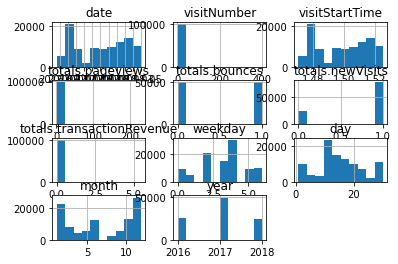

In [32]:
plt.figure(figsize=(20,20))
df.hist();

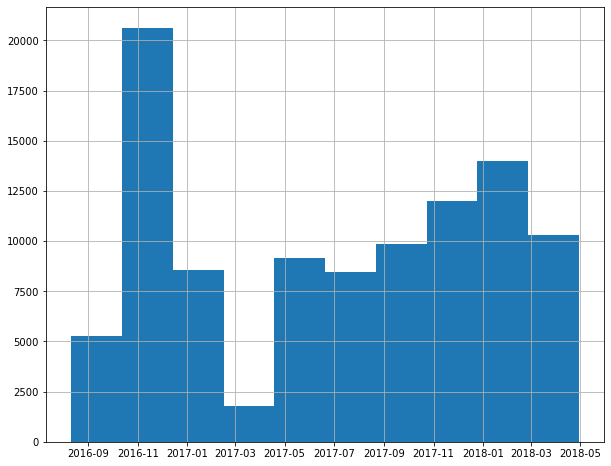

In [34]:
plt.figure(figsize=(10,8))
df.date.hist();

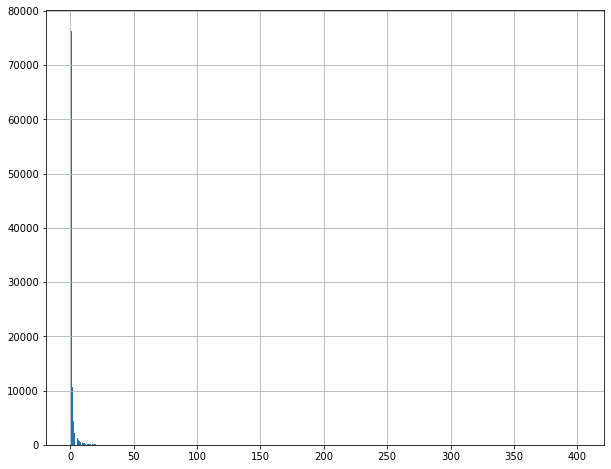

In [45]:
plt.figure(figsize=(10,8))
df.visitNumber.hist(bins=500);

In [49]:
df.visitNumber.max()

400

In [50]:
df.drop(df.loc[df['visitNumber']>=350].index, inplace=True)

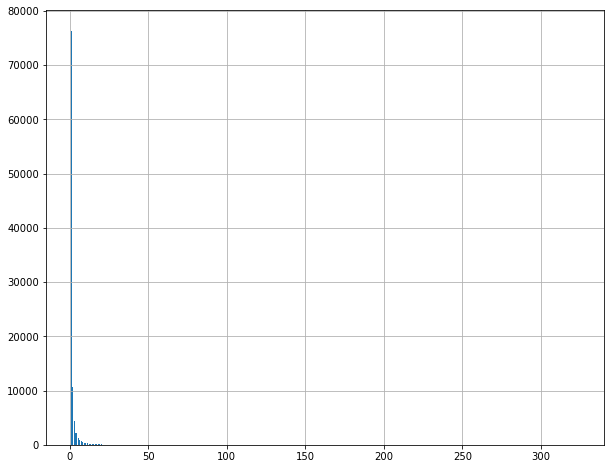

In [51]:
plt.figure(figsize=(10,8))
df.visitNumber.hist(bins=500);

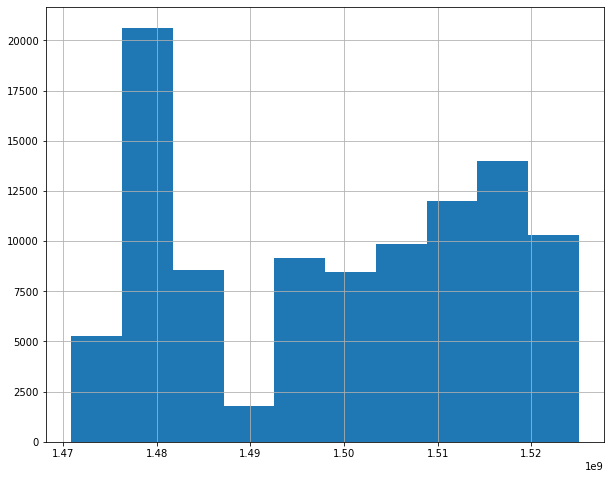

In [52]:
plt.figure(figsize=(10,8))
df.visitStartTime.hist();

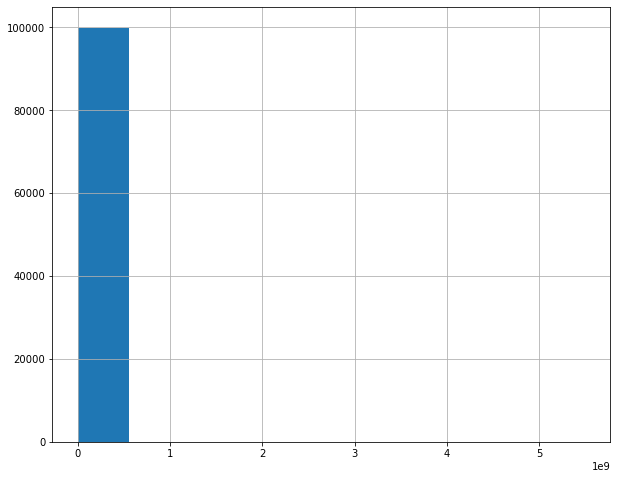

In [53]:
plt.figure(figsize=(10,8))
df['totals.transactionRevenue'].hist();

In [54]:
df['totals.transactionRevenue']

0               0.0
1               0.0
2               0.0
3               0.0
4               0.0
            ...    
99995           0.0
99996    46380000.0
99997           0.0
99998    47990000.0
99999           0.0
Name: totals.transactionRevenue, Length: 99995, dtype: float64

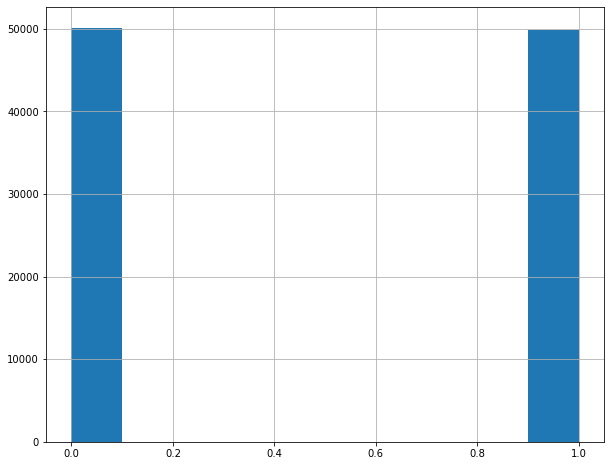

In [55]:
plt.figure(figsize=(10,8))
df['totals.bounces'].hist();